In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\\OSGeo4W64\\apps\\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/eduar/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/eduar/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
path = r"C:\Users\eduar\OneDrive\Ambiente de Trabalho\tpSIG\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp"
map_layer = QgsVectorLayer(path, 'world map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [4]:
csv_path = r"file:///C:\Users\eduar\OneDrive\Ambiente de Trabalho\tpSIG\owid-covid-data.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


Joining the two layers, note that map_layer does not have a geometric column.

In [5]:
QgsProject.instance().addMapLayer(map_layer)
QgsProject.instance().addMapLayer(csv_layer)
csv_iso='iso_code'
shp_iso='su_a3'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csv_iso)
joinObject.setTargetFieldName(shp_iso)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_layer)
map_layer.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('world map')[0]

# Checking if all columns were uploaded
for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Column featurecla Load
Column scalerank Load
Column LABELRANK Load
Column SOVEREIGNT Load
Column SOV_A3 Load
Column ADM0_DIF Load
Column LEVEL Load
Column TYPE Load
Column ADMIN Load
Column ADM0_A3 Load
Column GEOU_DIF Load
Column GEOUNIT Load
Column GU_A3 Load
Column SU_DIF Load
Column SUBUNIT Load
Column SU_A3 Load
Column BRK_DIFF Load
Column NAME Load
Column NAME_LONG Load
Column BRK_A3 Load
Column BRK_NAME Load
Column BRK_GROUP Load
Column ABBREV Load
Column POSTAL Load
Column FORMAL_EN Load
Column FORMAL_FR Load
Column NAME_CIAWF Load
Column NOTE_ADM0 Load
Column NOTE_BRK Load
Column NAME_SORT Load
Column NAME_ALT Load
Column MAPCOLOR7 Load
Column MAPCOLOR8 Load
Column MAPCOLOR9 Load
Column MAPCOLOR13 Load
Column POP_EST Load
Column POP_RANK Load
Column GDP_MD_EST Load
Column POP_YEAR Load
Column LASTCENSUS Load
Column GDP_YEAR Load
Column ECONOMY Load
Column INCOME_GRP Load
Column WIKIPEDIA Load
Column FIPS_10_ Load
Column ISO_A2 Load
Column ISO_A3 Load
Column ISO_A3_EH Load
Colu

In [10]:
#https://gis.stackexchange.com/questions/273266/reading-and-setting-label-settings-in-pyqgis-3

layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 12))
text_format.setSize(12)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Data_total_cases_per_million"
layer_settings.placement = 2

layer_settings.enabled = True

label_settings = QgsVectorLayerSimpleLabeling(layer_settings)


vlayer.setLabeling(label_settings)
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

Gerar mapa com 900 por 434


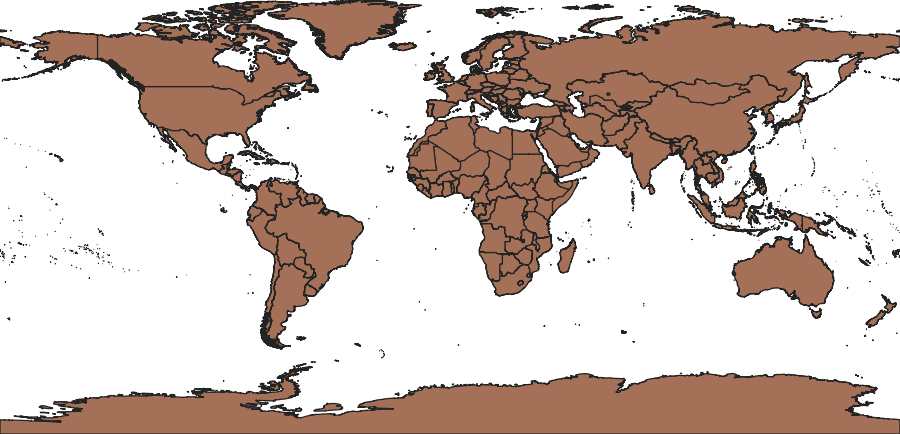

In [17]:
xt = vlayer.extent()
#print(xt)

width  = 900
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )